In [1]:
from pathlib import Path
import xarray as xr
import re
import numpy as np
#from xhistogram.xarray import histogram as xhist
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [5]:
#Paths (may need to be changed)
INALT_2009_T = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_T_iMirabilis.nc')
INALT_2009_U = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_U_iMirabilis.nc')
INALT_2009_V = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_V_iMirabilis.nc')
INALT_2009_W = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_1d_20090101_20091231_grid_W_iMirabilis.nc')
INALT_mask = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc')

ROMS = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/ROMS/roms_avg01_2009.nc')
ROMS_datetime = xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/roms_avg01_2009_datetime.nc')
SIGMA=xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_parent.nc')
ROMS_mesh = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/ROMS/roms_grd2_1500mVT1.nc')

In [82]:
topo_INALT = np.sum((INALT_mask.tmask*INALT_mask.e3t_0).isel(t=0),axis=0)

In [113]:
INALT_2009_U.nav_lon[0:2]

<xarray.DataArray 'nav_lon' (y: 2, x: 362)>
array([[ 0.025,  0.075,  0.125, ..., 17.975, 18.025, 18.075],
       [ 0.025,  0.075,  0.125, ..., 17.975, 18.025, 18.075]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
Dimensions without coordinates: y, x
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

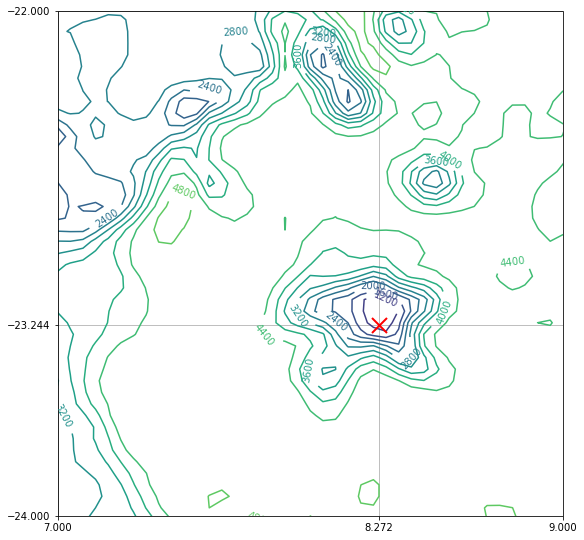

In [110]:
fig, ax = plt.subplots(1,1,figsize=(8,8),constrained_layout=True,
                      subplot_kw=dict(projection=ccrs.PlateCarree()))

ax.set_extent([7,9,
               -22,-24], crs=ccrs.PlateCarree())

c=ax.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=15) #INALT
ax.clabel(c, c.levels, inline=True, fontsize=10)
ax.set_xticks([7,8+16/60+20/60/60,9], crs=ccrs.PlateCarree())
ax.set_yticks([-24,-23-(14/60)-(40/60/60),-22], crs=ccrs.PlateCarree())
ax.grid()

ax.plot(8+16/60+20/60/60,-23-(14/60)-(40/60/60), 'rx',markersize=15,markeredgewidth=2,zorder=3)

plt.show()

In [10]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

In [11]:
SIGMA.h

<xarray.DataArray 'h' (lat_rho: 258, lon_rho: 238)>
array([[1688.2021, 1688.2021, 1694.7257, ..., 4377.0933, 4382.205 , 4382.205 ],
       [1688.2021, 1688.2021, 1694.7257, ..., 4377.0933, 4382.205 , 4382.205 ],
       [1679.1399, 1679.1399, 1694.0826, ..., 4377.9624, 4383.782 , 4383.782 ],
       ...,
       [3279.8616, 3279.8616, 3272.6602, ..., 3729.4805, 3723.1033, 3723.1033],
       [3282.2065, 3282.2065, 3275.8562, ..., 3729.1672, 3723.1667, 3723.1667],
       [3282.2065, 3282.2065, 3275.8562, ..., 3729.1672, 3723.1667, 3723.1667]],
      dtype=float32)
Coordinates:
  * lon_rho  (lon_rho) float32 6.51 6.525 6.539 6.554 ... 9.966 9.981 9.995
  * lat_rho  (lat_rho) float32 -24.96 -24.95 -24.93 ... -21.52 -21.5 -21.49
Attributes:
    long_name:      bottom depth
    standard_name:  bottom depth h
    units:          metre

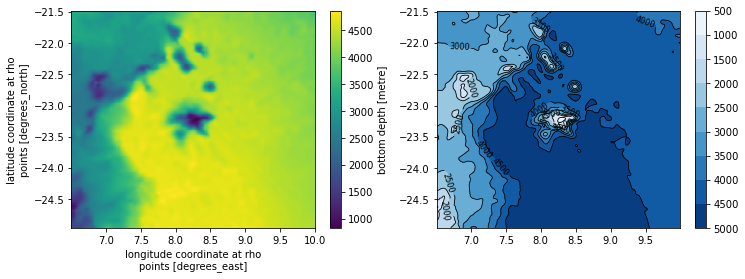

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
SIGMA.h.plot()
plt.subplot(1,2,2)
cf=plt.contourf(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=8,cmap='Blues')
c=plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=8,colors='black',linewidths=0.8)
plt.clabel(c, c.levels, inline=True, fontsize=8,fmt=fmt)
cb=plt.colorbar(cf)
cb.ax.invert_yaxis()

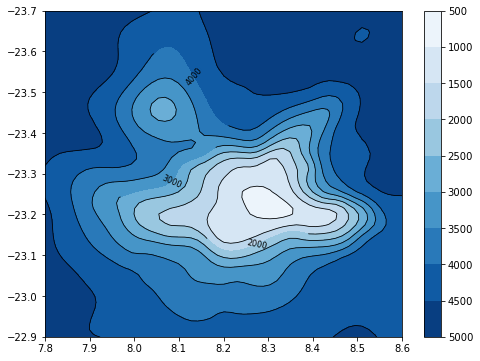

In [13]:
plt.figure(figsize=(8,6))
cf=plt.contourf(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=8,cmap='Blues')
c=plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=8,colors='black',linewidths=0.8)
plt.clabel(c, c.levels[1::2], inline=True, fontsize=8,fmt=fmt)
cb=plt.colorbar(cf)
cb.ax.invert_yaxis()

plt.xlim([7.8,8.6])
plt.ylim([-22.9,-23.7]);

In [30]:
temp_surface=INALT_2009_T['votemper'].isel(deptht=0)
salt_surface=INALT_2009_T['vosaline'].isel(deptht=0)

In [18]:
u_surface=INALT_2009_U['vozocrtx'].isel(depthu=0)
v_surface=INALT_2009_U['vozocrtx'].isel(depthu=0)

u_ewing=INALT_2009_U['vozocrtx'].isel(depthu=10)
v_ewing=INALT_2009_U['vozocrtx'].isel(depthu=10)

In [35]:
speed_surface= (u_surface**2 + v_surface**2) ** 0.5

In [19]:
speed_ewing= (u_ewing**2 + v_ewing**2) ** 0.5

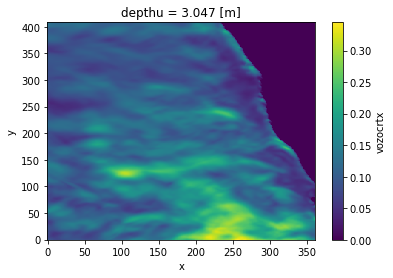

In [43]:
(np.mean(speed_surface,axis=0)).plot()

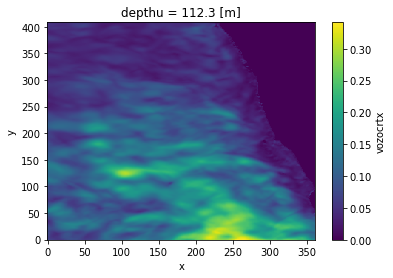

In [31]:
(np.mean(speed_ewing,axis=0)).plot()

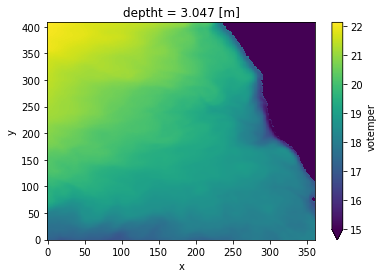

In [72]:
(np.mean(temp_surface,axis=0)).plot(vmin=15)

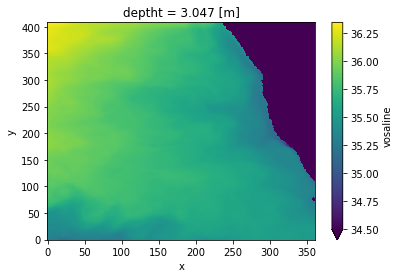

In [70]:
(np.mean(salt_surface,axis=0)).plot(vmin=34.5)

AttributeError: 'str' object has no attribute 'ndim'

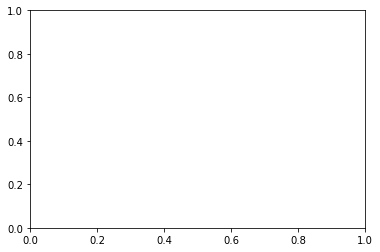

In [48]:
plt.streamplot(x='nav_lon',y='nav_lon',u=np.mean(u_surface,axis=0),v=np.mean(v_surface,axis=0))

In [45]:
u_surface

<xarray.DataArray 'vozocrtx' (time_counter: 365, y: 409, x: 362)>
array([[[ 0.145327,  0.126833, ...,  0.171843,  0.169448],
        [ 0.143196,  0.12546 , ...,  0.155326,  0.156184],
        ...,
        [-0.087813, -0.088225, ...,  0.      ,  0.      ],
        [-0.089676, -0.090403, ...,  0.      ,  0.      ]],

       [[ 0.151111,  0.1336  , ...,  0.214781,  0.214165],
        [ 0.150456,  0.133674, ...,  0.189557,  0.191184],
        ...,
        [-0.048642, -0.048044, ...,  0.      ,  0.      ],
        [-0.047885, -0.047468, ...,  0.      ,  0.      ]],

       ...,

       [[-0.037134, -0.035125, ...,  0.227934,  0.210395],
        [-0.04443 , -0.043823, ...,  0.21919 ,  0.207967],
        ...,
        [-0.036834, -0.03986 , ...,  0.      ,  0.      ],
        [-0.039305, -0.042966, ...,  0.      ,  0.      ]],

       [[ 0.004335,  0.005589, ...,  0.247449,  0.21873 ],
        [-0.005251, -0.005374, ...,  0.222453,  0.199076],
        ...,
        [-0.047975, -0.052212, ...,  0.      ,  0.      ],
        [-0.052824, -0.057624, ...,  0.      ,  0.      ]]], dtype=float32)
Coordinates:
    depthu         float32 3.047
    nav_lat        (y, x) float32 ...
    nav_lon        (y, x) float32 ...
    time_centered  (time_counter) datetime64[ns] 2009-01-01T12:00:00 ... 2009...
  * time_counter   (time_counter) datetime64[ns] 2009-01-01T12:00:00 ... 2009...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_water_x_velocity
    long_name:           Sea Water X Velocity
    units:               m/s
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s)